# Seattle AirBnb

In this analysis, I have analysed the trends of various AirBnb bookings throughtout the year. I have taken the survey results for Calendar for AirBnb hostings from Kaggle and will attempt to answer the following questions.

1. What are the busiest times of the year to visit Seattle? 
2. By how much do prices spike throughout the year?
3. Is there a general relation between the availability of listings and average price of listings?

In [1]:
import pandas as pd
import numpy as np
import calmap
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from matplotlib.dates import DateFormatter

%matplotlib inline

## Data Reading and Understanding

In [2]:
# Reading the various survey files for the year 2020-21 and understand the data to decide 
# which questions to be answered
df_cal = pd.read_csv('seattle_calendar.csv')

Before forming any business related questions for my dataset, I went through the dataframe and tried to make sense of all the columns. I analysed the columns and the amount of general data being offered by the dataset and using that formed my questions for the business which could be answered by gaining insights from the data.

General Data Exploration and Data Cleaning involved:
1. Understanding the data types of each column
2. Presence of Null Values
3. Conversion of data types if needed


### Calendar Dataset Analysis

In [3]:
# Printing Calendar Dataset and its information
df_cal.info()
df_cal.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1393570 entries, 0 to 1393569
Data columns (total 4 columns):
 #   Column      Non-Null Count    Dtype 
---  ------      --------------    ----- 
 0   listing_id  1393570 non-null  int64 
 1   date        1393570 non-null  object
 2   available   1393570 non-null  object
 3   price       934542 non-null   object
dtypes: int64(1), object(3)
memory usage: 42.5+ MB


,listing_id,date,available,price
0,241032,2016-01-04,t,$85.00
1,241032,2016-01-05,t,$85.00
2,241032,2016-01-06,f,NaN
3,241032,2016-01-07,f,NaN
4,241032,2016-01-08,f,NaN


In [4]:
# Check for missing values in the calendar dataset
df_cal.isnull().sum()

listing_id         0
date               0
available          0
price         459028
dtype: int64

In [5]:
# Converting prices to 'float' by removing $ from values from the calendar dataset
df_cal[df_cal.columns[3:5]] = df_cal[df_cal.columns[3:5]].replace('[\$,]', '', regex = True).astype(float)

In [6]:
# Types of values in Available column and its frequency
df_cal['available'].value_counts()

t    934542
f    459028
Name: available, dtype: int64

In [7]:
# Creating duplicate of dataframe for Data Wrangling
df_cal_n = df_cal.copy()

# Replacing 't' & 'f' with 1 & 0 
df_cal_n['available'] = df_cal_n['available'].replace(['f','t'],[0,1], regex = True)

In [8]:
# Changing 'date' column to datetime format
df_cal_n['date'] = pd.to_datetime(df_cal_n['date'])

### Pandas Dataframe to  Pandas Series Function for Heatplot

For plotting a Heatmap plot, the **calmap** library functions only accept Pandas Series with the Date and Attribute to be plotted columns. The following function will help us generate the same for any desired attribute 

In [9]:
def datetime_series(df, date ,column_name):
    '''
    INPUT:
        df - pd.DataFrame, Pandas DataFrame which contains the Date column and the 
             desired column to be converted to Pandas Series format.
        date - str, Name of the date column.
        column_name - str, Name of the desired column.
        
    OUTPUT:
        df_cal_column_name - pd.Series, Pandas Series with Date and desired column values 
                             only.
    '''
    
    df_cal_column_name = pd.Series(data = list(df[column_name]), 
                                   index = df[date] , name = str(column_name))
    
    return df_cal_column_name

In [10]:
df_cal_avail = datetime_series(df_cal_n, 'date', 'available')         # Availability
df_cal_price = datetime_series(df_cal_n, 'date', 'price')             # Price

### Calendar Heatmap Function

In [11]:
def calendar_heatmap(df, ylabel):
    '''
    INPUT:
        df - pd.Series, Pandas Series which contains the Date column and the desired
             column to be plotted into the Calendar Heatmap.
        ylabel - str, Name of the attribute being plotted as heatmap.
        
    OUTPUT:
        fig - Calendar Heatmap plot with desired attribute as the function to be plotted.
    '''
    
    fig, ax = calmap.calendarplot(df, fillcolor = 'lightgrey', linewidth = 1,
                               linecolor ='#F5F5F5', cmap = 'RdYlGn', 
                               fig_kws = dict(figsize = (22,8)))
    
    fig.colorbar(ax[0].get_children()[1], ax = ax.ravel().tolist())
    #fig.suptitle(df.name.title().replace('_',' '), fontsize = 35, x = 0.4 )
    fig.suptitle(ylabel.title(), fontsize = 35, x = 0.4 )

    return 

## Availability Heatmap

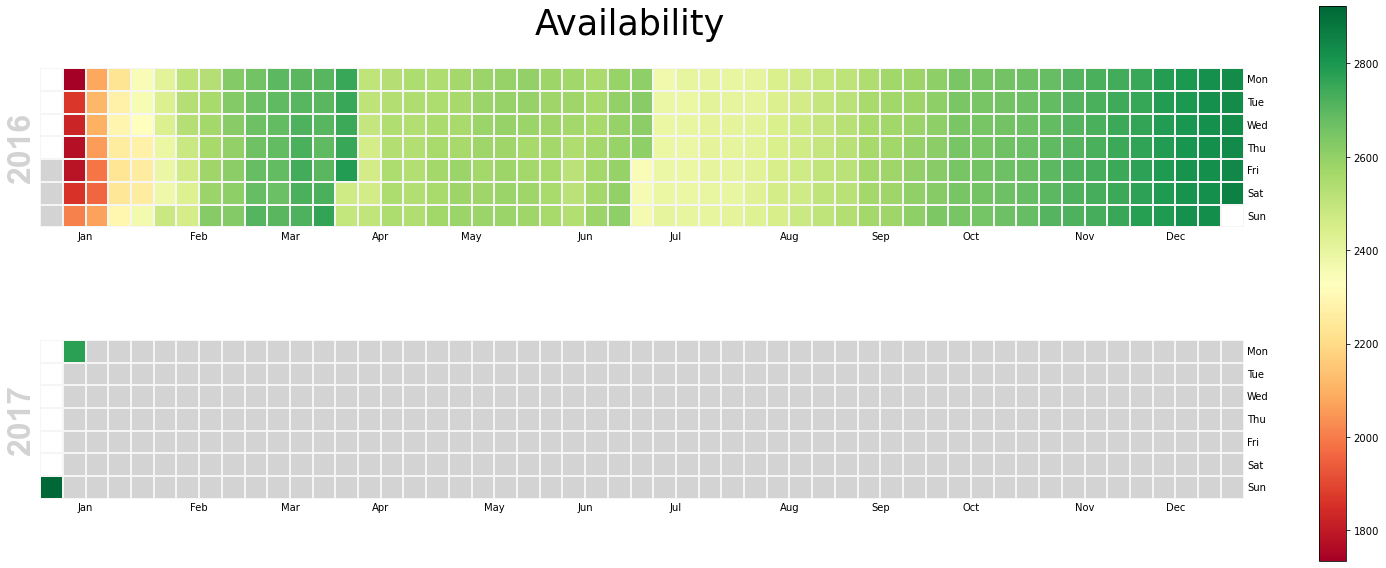

In [12]:
calendar_heatmap(df_cal_avail, 'Availability')

## Price Heatmap

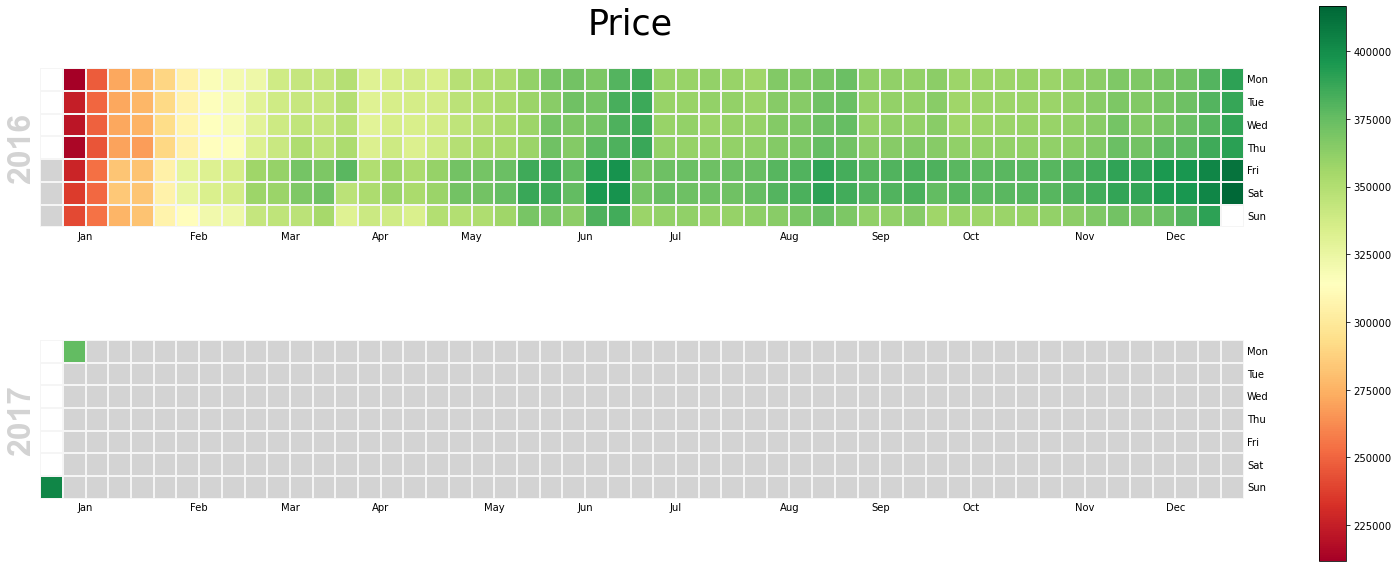

In [15]:
calendar_heatmap(df_cal_price, 'Price')

### Time Series Plot Function

For observing trends in an attribute over a period of time, a time series plot is generally more useful and easier to observe. The following function creates the same by using three different resampling methods viz. Daily, Weekly & Rolling Mean and combining them together on the same plot.

In [14]:
def calendar_timeseries(start, end, df, ylabel):
    '''
    INPUT:
        start - str, Starting Date for the Time Series Plot. Date has to be in the datetime format.
        end - str, Ending Date for the Time Series Plot. Date has to be in the datetime format.
        df - pd.Series, Pandas Series which contains the Date column and the desired
             column to be plotted into the Time Series Plot.
        ylabel - str, Name of the attribute being plotted as function of time.
        
    OUTPUT:
        fig - Time Series plot with desired attribute as the function to be plotted.
    '''
    
    # Resampling Pandas Series into Daily, Weekly and 7-d Rolling Mean samples  
    df_daily = df.resample('D').mean()
    df_weekly = df.resample('W').mean()
    df_7d = df_daily.rolling(7, center = True).mean()
    
    # Plot Daily, Weekly and 7-d Rolling mean resampled time series together
    fig, ax = plt.subplots(figsize = (22, 8))
    
    # Daily
    ax.plot(df_daily.loc[start:end],
    marker = '.', linestyle = '-', linewidth = 0.5, label = 'Daily Mean Resample')
    
    # Weekly
    ax.plot(df_weekly.loc[start:end],       
    marker = 'o', markersize = 8, linestyle = '-', label = 'Weekly Mean Resample')
    
    # 7-d Rolling Mean
    ax.plot(df_7d.loc[start:end],
    marker = '.', linestyle = '-', label = '7-d Rolling Mean')
    
    date_form = DateFormatter("%d-%b-%Y")
    ax.xaxis.set_major_formatter(date_form)
    ax.set_ylabel(ylabel)
    ax.set_title(ylabel, fontsize = 35)
    
    ax.legend()
    ax.grid()
    
    return

The following function is just a slight variation of the original calendar_timeseries function. This function is able to plot the time series plot of two attributes in the same plot for analysis of two attributes side by side.

In [53]:
def calendar_timeseries_multi(start, end, df1, df2, ylabel1, ylabel2):
    '''
    INPUT:
        start - str, Starting Date for the Time Series Plot. Date has to be in the datetime format.
        end - str, Ending Date for the Time Series Plot. Date has to be in the datetime format.
        df1, df2 - pd.Series, Pandas Series which contains the Date column and the desired column 
                   to be plotted into the Time Series Plot.
        ylabel1, ylabel2 - str, Names of the attributes being plotted as function of time.
        
    OUTPUT:
        fig - Time Series plot with desired attribute as the function to be plotted.
    '''
    
    # Resampling Pandas Series into Daily and 7-d Rolling Mean samples
    df_daily1 = df1.resample('D').mean()
    df_7d1 = df_daily1.rolling(7, center = True).mean()
    
    df_daily2 = df2.resample('D').mean()
    df_7d2 = df_daily2.rolling(7, center = True).mean()
    
    
    # Plot 7-d Rolling mean resampled time series of both DataFrames together
    fig, ax1 = plt.subplots(figsize = (22, 8))
    ax2 = plt.twinx()
    
    
    #df1 : 7-d Rolling Mean
    ln1 = ax1.plot(df_7d1.loc[start:end],
    marker = '.', linestyle = '-', label = '7-d Rolling Mean {}'.format(ylabel1))
    
    date_form = DateFormatter("%d-%b-%Y")
    ax1.xaxis.set_major_formatter(date_form)
    ax1.set_ylabel(ylabel1)
    
    #df2 : 7-d Rolling Mean
    ln2 = ax2.plot(df_7d2.loc[start:end], color = 'orange',
    marker = '.', linestyle = '-', label = '7-d Rolling Mean {}'.format(ylabel2))
    
    date_form = DateFormatter("%d-%b-%Y")
    ax2.xaxis.set_major_formatter(date_form)
    ax2.set_ylabel(ylabel2)
    
    
    # Combined Legend for the plot
    ln = ln1 + ln2
    labels = [l.get_label() for l in ln]
    ax1.legend(ln, labels, loc = 'upper left')
    ax1.set_title('{} V/S {}'.format(ylabel1, ylabel2), fontsize = 35)
    ax1.grid()
    
    return

## Price Trends

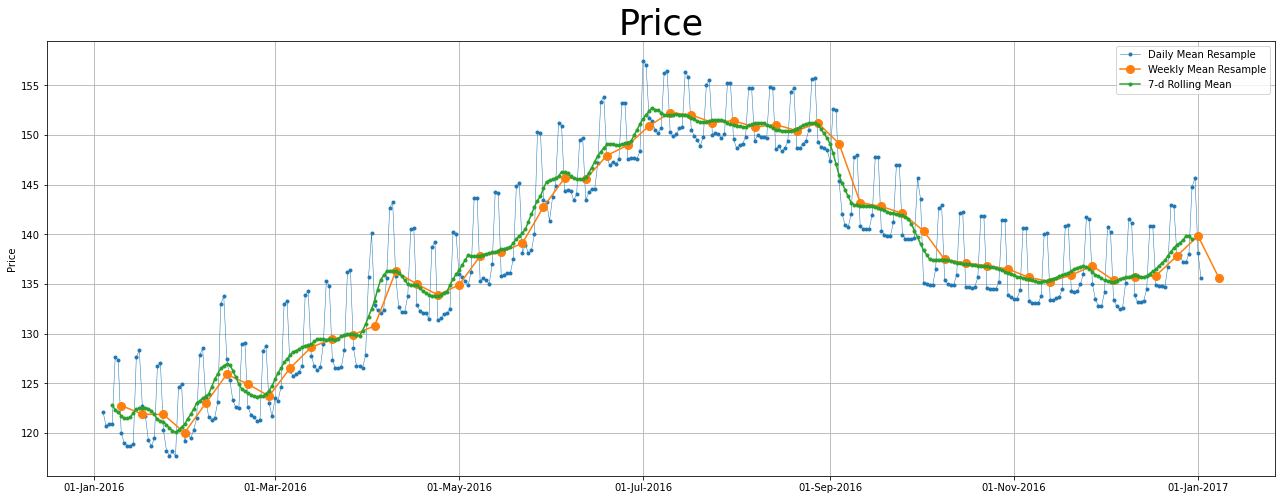

In [48]:
calendar_timeseries('2016-01','2017-01', df_cal_price, 'Price')

## Availability Trends

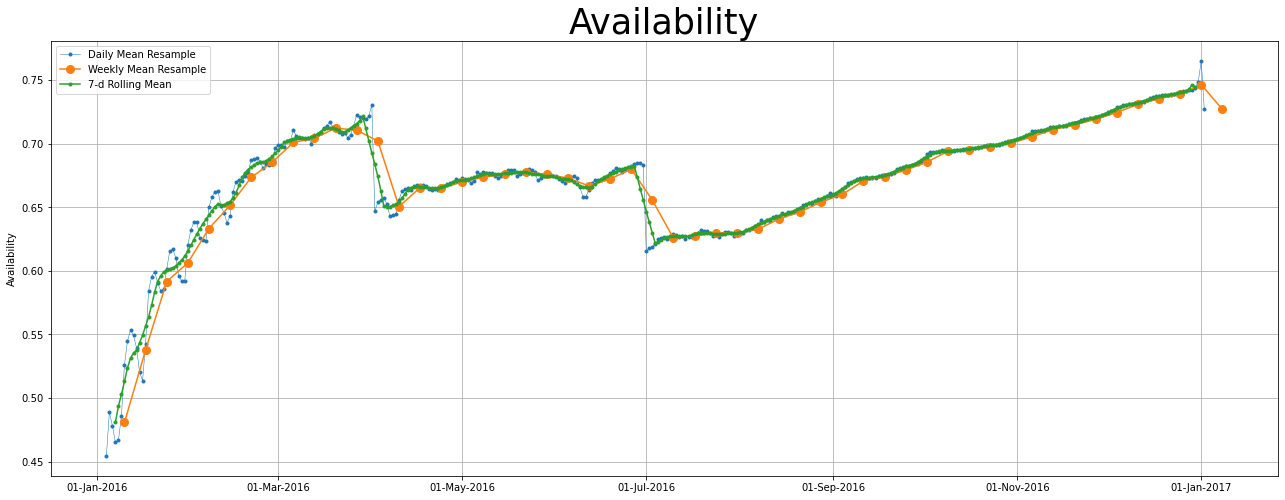

In [49]:
calendar_timeseries('2016-01','2017-01', df_cal_avail, 'Availability')

## Price V/S Availability Trends

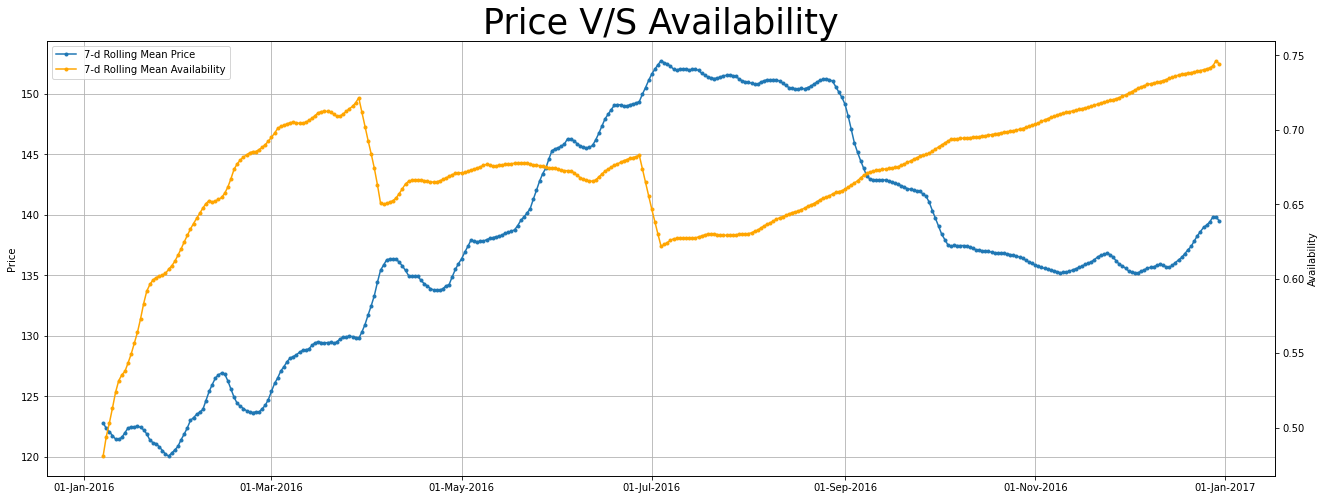

In [54]:
calendar_timeseries_multi('2016-01','2017-01', df_cal_price, df_cal_avail, 'Price', 'Availability')

## Data Modelling
There is no data modelling as I am not using any machine learning methods for the questions I need to answer.